<a href="https://colab.research.google.com/github/kevin-bcs/kevin_carbajal/blob/main/L04_Red_Neuronal_Densa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Densa (Perceptrón Multicapa MLP)
## Dr. Carlos Villaseñor

Paso 1. Correr paqueterias

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Paso 2. Corre el siguiente bloque con diferentes funciones de activación

In [28]:
# Funciones de activación
def linear(z, derivative=False):
    a = z
    if derivative:
        da = 1
        return a, da
    return a


def sigmoid(z, derivative=False):
    a = 1/(1+np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a


def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

Paso 3. Completa la siguiente clase para programar la red densa

In [47]:
class MLP:

  def __init__(self, layers_dims,
               hidden_activation=relu,
               output_activation=sigmoid,
               learning_rate=0.1):

      # Instance Attributes
    self.L = len(layers_dims) - 1
    self.w = [None] * (self.L + 1)
    self.b = [None] * (self.L + 1)
    self.f = [None] * (self.L + 1)
    self.layers = layers_dims
    self.eta = learning_rate

    # Initialize weights
    for l in range(1, self.L + 1):
      self.w[l] = -1 +2 * np.random.rand(layers_dims[1], layers_dims[l-1])
      self.b [l]= -1 +2 * np.random.rand(layers_dims[1],1)
      if l == self.L:
        self.f[l] = output_activation
      else:
        self.f[l] = hidden_activation

  def predict(self, X):
    A = X.copy()
    for l in range(1, self.L + 1):
      Z = self.w[l] @ A + self.b [l]
      A = self.f[l] (Z)
    return A

  def fit(self, X, Y, epochs=500):

    # Number of samples
    p = X.shape[1]

    #Gradient Descent
    for _ in range(epochs):

      # Initialize activations and their derivatives
      A = [None] * (self.L + 1)
      dA = [None] * (self.L + 1)
      lg = [None] * (self.L + 1)

      # Propagation
      A [0] = X.copy ()
      for l in range (1, self.L + 1):
        Z = self.w [l] @ A [l-1] + self.b[l]
        A [l], dA[l] = self.f[l] (Z, derivative=True)


      # Backpropagation
      for l in range(self.L, 0, -1):
        if l == self.L:
          lg [l] = (Y - A[l]) * dA[l]
        else:
          lg[l] = (self.w[l+1].T @ lg[l+1] * dA[1])

      # Update parameters
      for l in range (1, self.L + 1):
        self.w[l] += (self.eta/p) * (lg[l] @ A[l-1].T)
        self.b[l] += (self.eta/p) * np.sum(lg[l])


Paso 4. Ejecuta la siguiente linea que te ayudará a dibujar las predicciones de la red

In [55]:
def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==0:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax,100),
                         np.linspace(ymin,ymax,100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8,
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()

Paso 5. Crea los datos para de la compuerta XOR

In [56]:
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

Paso 6. Corre el siguiente código para ver la predicción de la red antes de entrenar

[[0.37708618 0.21893559 0.56351828 0.30429145]
 [0.25548314 0.08101228 0.23909472 0.10394144]
 [0.11955829 0.05298995 0.09875478 0.03842807]
 [0.87125995 0.95734691 0.6154837  0.81180343]
 [0.31006777 0.21802664 0.82423348 0.6746449 ]
 [0.26622629 0.40508231 0.55958837 0.76532136]
 [0.65040312 0.71496733 0.61734697 0.63488204]
 [0.81760013 0.95978552 0.68545203 0.93235585]
 [0.59479243 0.40047816 0.63146577 0.47387219]
 [0.47121137 0.51871267 0.39514784 0.31064755]
 [0.61888342 0.53624253 0.61809495 0.43562759]
 [0.21957155 0.19419537 0.51653797 0.57399738]
 [0.09179148 0.04240157 0.0646144  0.02534289]
 [0.56766203 0.16041331 0.1517601  0.0165033 ]
 [0.88143238 0.81458001 0.45981181 0.39178072]
 [0.49297712 0.28099388 0.19304762 0.09536631]
 [0.37884671 0.20555247 0.76821731 0.58570362]
 [0.60997038 0.38859441 0.93306003 0.88750896]
 [0.88761721 0.58564385 0.86415247 0.55356642]
 [0.39966936 0.12361954 0.2579467  0.045084  ]]


ValueError: cannot reshape array of size 200000 into shape (100,100)

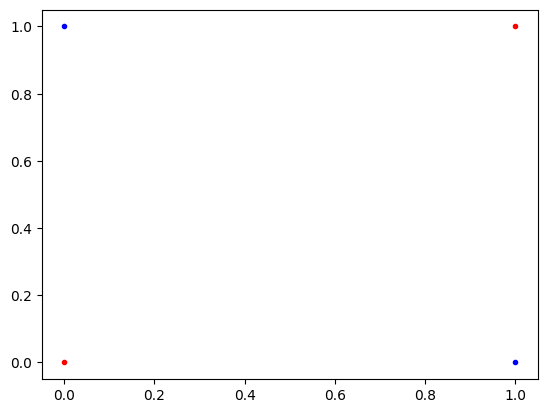

In [57]:
net = MLP((2,20,1), learning_rate=0.2)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

Paso 7. Repite el código anterior pero agrega el entrenamiento

[[0.23160584 0.23160584 0.94684171 0.04583555]
 [0.61543615 0.61543615 0.97217201 0.03987375]
 [0.58891641 0.58891641 0.9458201  0.08014906]
 [0.60763235 0.60763235 0.94372336 0.03647772]
 [0.25133199 0.25133199 0.94863733 0.06134066]
 [0.48008172 0.48008172 0.94153408 0.06380922]
 [0.51659999 0.51659999 0.95997699 0.07187685]
 [0.48882081 0.48882081 0.95961288 0.05561673]
 [0.63360649 0.63360649 0.95830053 0.06054151]
 [0.61821352 0.61821352 0.95922078 0.03715282]
 [0.4081704  0.4081704  0.94467004 0.05725071]
 [0.47250561 0.47250561 0.97358912 0.05274006]
 [0.6504207  0.6504207  0.94498621 0.04369633]
 [0.62862286 0.62862286 0.97307158 0.0569934 ]
 [0.66507249 0.66507249 0.93580582 0.05171486]
 [0.41356975 0.41356975 0.974378   0.05253058]
 [0.2855676  0.2855676  0.96631679 0.07849571]
 [0.55113149 0.55113149 0.95330844 0.05192946]
 [0.39149587 0.39149587 0.95004696 0.05423896]
 [0.34344019 0.34344019 0.95021175 0.06349964]]


ValueError: cannot reshape array of size 200000 into shape (100,100)

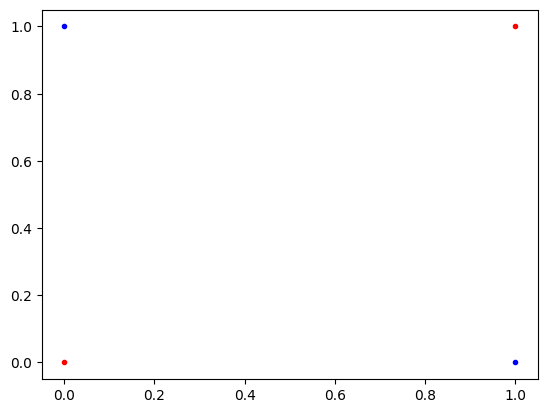

In [51]:
net.fit(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

Paso 8. Crea una red neuronal, y entrenala para el dataset "blobs.csv", Dibuja tus resultados al igual que el problema XOR

Paso 9. Crea una red neuronal, y entrenala para el dataset "moons.csv", Dibuja tus resultados al igual que el problema XOR

Paso 10. Crea una red neuronal, y entrenala para el dataset "circles.csv", Dibuja tus resultados al igual que el problema XOR

Paso 11. Puedes usar bibliotecas como sklearn para usar esta red neuronal ([referencia](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)). En el siguiente código usa cualquiera de los dataset anteriores para entrenar un clasificador (puedes usar un regresor importando sklearn.neural_network.MLPRegressor)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Lee aqui uno de los archivos csv anteriores y selecciona las variables


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model.fit(x, y)
print('Desempeño: ', model.score(x, y))